Doğruluk Değeri: 0.8966756513926325


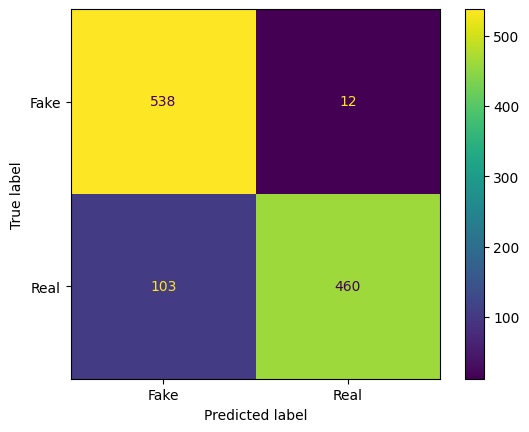

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import numpy as np

# Verileri oku
real = pd.read_csv("islenmis_dogru_haberler.csv")
fake = pd.read_csv("islenmis_sahte_haberler.csv")

# Label ekle
real['label'] = 1
fake['label'] = 0

# Verileri birleştir
df = pd.concat([real, fake], ignore_index=True)
X = df["Haber"]
y = df['label']

# Word2Vec modeli oluşturma
sentences = [news.split() for news in X]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Her kelimenin vektörlerini ortalamak için belge vektörlerini oluşturma
X_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in news.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for news in X])

# Veriyi eğitim ve test setlerine ayırma
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(X_word2vec, y, test_size=0.25, random_state=1)

# KNN modeli oluşturma ve eğitme
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_word2vec, y_train_word2vec)

# Test verisi üzerinde tahmin yapma
y_pred_word2vec = knn_model.predict(X_test_word2vec)

# Doğruluk değerini hesapla
accuracy = accuracy_score(y_test_word2vec, y_pred_word2vec)

# Doğruluk değerini yazdır
print("Doğruluk Değeri:", accuracy)

# Confusion matrix oluşturma ve çizdirme
cm_word2vec = confusion_matrix(y_test_word2vec, y_pred_word2vec)
disp_word2vec = ConfusionMatrixDisplay(confusion_matrix=cm_word2vec, display_labels=['Fake', 'Real'])
disp_word2vec.plot()
